# Part A: Iris Dataset

In [1]:
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

#### 1) Display the image of each type of flower with dimension 300 *300.

Virginica


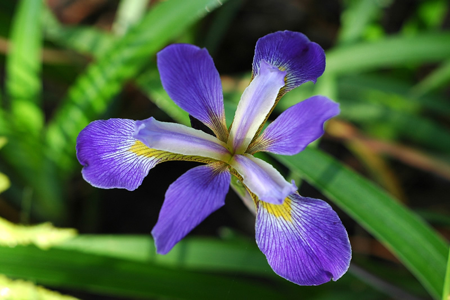

In [3]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://www.fs.usda.gov/wildflowers/beauty/iris/Blue_Flag/images/iris_virginica/iris_virginica_virginica_lg.jpg")
virginica = Image.open(BytesIO(response.content)).resize((450,300))
print("Virginica")
virginica

Setosa


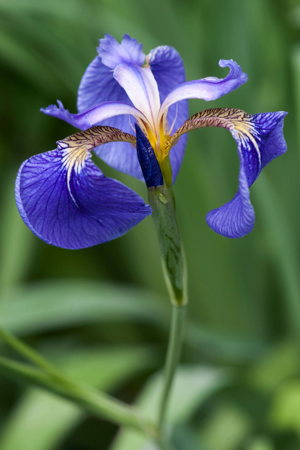

In [4]:
response = requests.get("http://t1.gstatic.com/licensed-image?q=tbn:ANd9GcQbiaoVc7HPMPHfdJpaJt4RgbJbBDjLl1AeZxsZebfnSCRc03VCmeRLT3BR2VwsM4EtZLy_WPlSyNzPc6o")
setosa = Image.open(BytesIO(response.content)).resize((300,450))
print("Setosa")
setosa

Versicolor


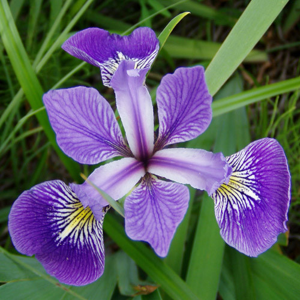

In [4]:
response = requests.get("https://www.plant-world-seeds.com/images/item_images/000/003/884/large_square/IRIS_VERSICOLOR.JPG?1495391088")
versicolor = Image.open(BytesIO(response.content)).resize((300,300))
print("Versicolor")
versicolor

#### 2) Get the data. Use sns.load_dataset method for this task.

In [5]:
iris = sns.load_dataset("iris")

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### 3) Do some Exploratory analysis of the data set and answer the following questions:
 * Which flower species seems to be the most separable?** (Hint: Create a Pairplot)
 * Analyse sepal_length versus sepal_width for setosa species of flower. (Hint:Use Kde plot). What is your analysis?

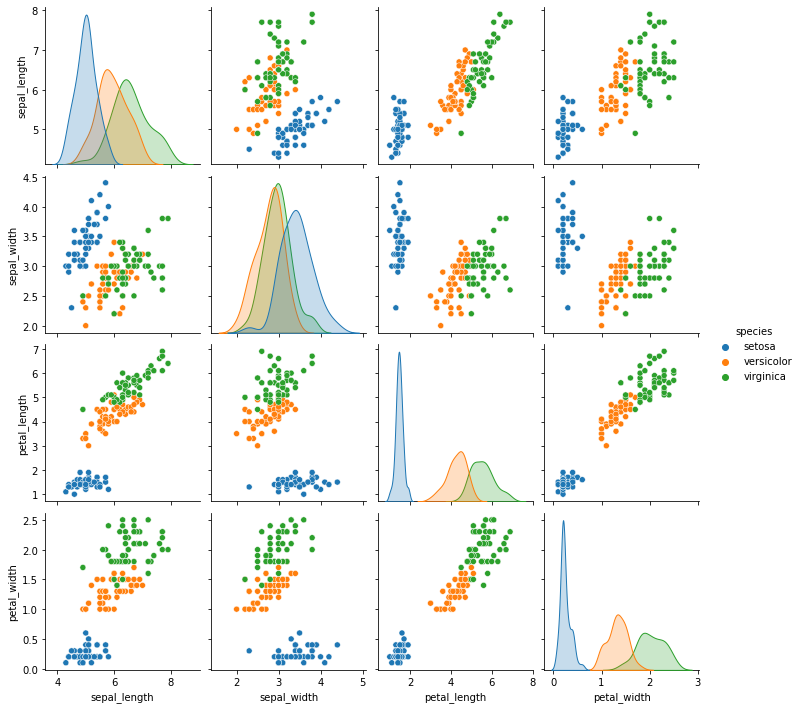

In [7]:
sns.pairplot(iris, hue='species')

As we can see from the plot above, the most separable species is setosa.The scatterplots from setosa species is the furthest from the other two.

Text(0, 0.5, 'Probability Density')

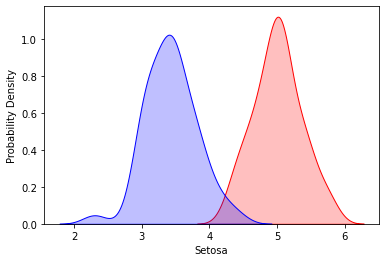

In [8]:
sns.kdeplot(iris.loc[(iris['species']=='setosa'),
            'sepal_length'], color='r', shade=True)
  
sns.kdeplot(iris.loc[(iris['species']=='setosa'), 
            'sepal_width'], color='b', shade=True)
  
plt.xlabel('Setosa')
plt.ylabel('Probability Density')

From the above plot we can see that the sepal length and width both have a similar distribution curve, with sepal_length having higher values.

#### 4) Split your data into a training set and a testing set.

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
iris = load_iris()
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target).values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.30, random_state=101)

#### 5) Train the model

In [12]:
from sklearn.svm import SVC

In [13]:
model = SVC()

In [14]:
model.fit(X_train, y_train)

SVC()

#### 6) Model Evaluation: Now get predictions from the model and create a confusion matrix and a classification report.


In [15]:
predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print ("Confusion Matrix")
print(confusion_matrix(y_test,predictions))

Confusion Matrix
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [18]:
print ("Classification Report")
print(classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45




#### 7) Now it’s time to tune the parameters of the model to get better results. Use GridSearchCV for tuning.

In [19]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.905 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.905 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [24]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

#### 8) Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?**

In [25]:
grid_predictions = grid.predict(X_test)

In [26]:
print(confusion_matrix(y_test,grid_predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [27]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The accuracy of the model was already very high, therefore nothing was improved.

# Part B: KNN_Project_Data

#### 1) Pre-requisite steps
 * Import the libraries
 * Get the data
 * Do some analysis like analyze what’s the dimension of the data, mean, sum , is this null etc. (You can do any number of steps for this task).

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df = pd.read_csv("KNN_Project_Data/KNN_Project_Data",index_col=0)

In [30]:
df.head(10)

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
1587.993461,667.420121,2072.048544,364.624958,905.011385,2229.178514,880.442566,568.698408,645.719217,2156.949990,1
1497.293624,822.435853,908.059366,671.797517,1280.270442,1910.066313,1052.812386,713.757499,703.951632,1088.493788,0
1172.820769,1166.958461,455.656588,445.572745,1109.894585,1045.551452,1301.821786,264.940137,945.023932,2307.922229,0
839.494647,1089.747059,653.699894,659.334590,1529.725972,1521.320489,1401.676227,433.025043,1289.063583,1690.149835,0


In [31]:
df.shape

(1000, 10)

In [32]:
df.isna().sum()

GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [33]:
df2 = df.copy()
df2['mean'] = df.mean(axis=1)
df2

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS,mean
XVPM,,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0,1073.000313
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1,1010.381500
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1,1212.721911
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0,706.468804
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0,920.556175
...,...,...,...,...,...,...,...,...,...,...,...
1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0,859.024832
938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1,943.664499
921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1,997.422119


In [34]:
df2['sum'] = df.sum(axis=1)
df2

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS,mean,sum
XVPM,,,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0,1073.000313,10730.003130
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1,1010.381500,10103.815001
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1,1212.721911,12127.219108
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0,706.468804,7064.688044
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0,920.556175,9205.561755
...,...,...,...,...,...,...,...,...,...,...,...,...
1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0,859.024832,8590.248318
938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1,943.664499,9436.644991
921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1,997.422119,9974.221187


#### 2) Do some Exploratory analysis of the data set and try to find out of the different columns are related to each other or not?


In [35]:
df2.drop('TARGET CLASS',axis=1,inplace=True)
df2.drop('mean',axis=1,inplace=True)
df2.drop('sum',axis=1,inplace=True)

In [36]:
cormat = df2.corr()
round(cormat,2)

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
GWYH,1.00,-0.22,0.12,-0.10,0.04,-0.10,0.06,0.04,0.11
TRAT,-0.22,1.00,-0.04,0.12,0.01,0.12,-0.07,-0.07,-0.12
TLLZ,0.12,-0.04,1.00,-0.01,-0.00,-0.06,0.05,0.09,0.07
IGGA,-0.10,0.12,-0.01,1.00,0.00,0.08,-0.04,-0.01,-0.07
HYKR,0.04,0.01,-0.00,0.00,1.00,-0.01,0.00,0.03,-0.01
EDFS,-0.10,0.12,-0.06,0.08,-0.01,1.00,-0.07,0.01,-0.05
GUUB,0.06,-0.07,0.05,-0.04,0.00,-0.07,1.00,0.01,0.06
MGJM,0.04,-0.07,0.09,-0.01,0.03,0.01,0.01,1.00,0.01
JHZC,0.11,-0.12,0.07,-0.07,-0.01,-0.05,0.06,0.01,1.00


In [37]:
import seaborn as sns

<AxesSubplot:>

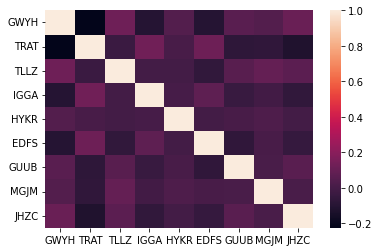

In [38]:
sns.heatmap(cormat)

#### 3) As the data is of different scales. So apply standardization over the data set. Crosscheck after this step of the data is actually standardized or not.

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [42]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [43]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


#### 4) Use the predict method to predict values using your KNN model and X_test.Also create confusion matrix and a classification report.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
pred = knn.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print("Confusion Matrix")
print(confusion_matrix(y_test,pred))

Confusion Matrix
[[103  45]
 [ 33 119]]


In [52]:
print("Classification Report")
print(classification_report(y_test,pred))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       148
           1       0.73      0.78      0.75       152

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



#### 5) At step 4, we may not be satisfied with the results. Let's go ahead and use the elbow method to pick a good K Value!

* Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. 
* Now create a plot (a sample graph is given below) using the information from your for loop.

In [53]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

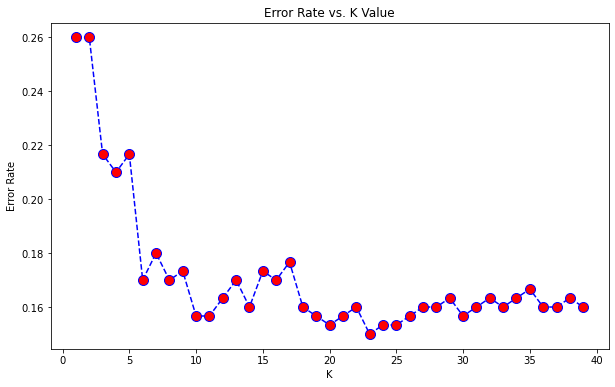

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



In [56]:
# NOW WITH NEW K-VALUE

knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate))+1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=', error_rate.index(min(error_rate))+1)
print('\n Confusion Matrix')
print(confusion_matrix(y_test,pred))
print('\n Classification Report')
print(classification_report(y_test,pred))

WITH K= 23

 Confusion Matrix
[[117  31]
 [ 14 138]]

 Classification Report
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       148
           1       0.82      0.91      0.86       152

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

